# 3주차 Session 2: 사이킷런으로 모델 만들기 (Practice)

Scikit-learn을 사용하여 당뇨병 데이터셋(Diabetes Dataset)을 학습시키고 예측해봅니다.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 1. 데이터 로드 및 확인

In [25]:
# 사이킷런 내장 데이터셋인 당뇨병(diabetes) 데이터를 로드합니다.
# 이 데이터셋은 442명의 당뇨병 환자 데이터로, 나이, 성별, BMI 등 10개의 특성(feature)을 가집니다.
diabetes = load_diabetes()

# 입력 데이터 (Features): 환자의 특성 정보 (442개 샘플, 10개 특성)
X = diabetes.data
# 타겟 데이터 (Target): 1년 뒤 당뇨병 진행률 (수치형 데이터 -> 회귀 문제)
y = diabetes.target

# 데이터의 형태(Shape)를 확인하여 샘플 수와 특성 수를 파악합니다.
print(f"Data shape: {X.shape}")   # (442, 10)
print(f"Target shape: {y.shape}") # (442,)

Data shape: (442, 10)
Target shape: (442,)


### 2. 데이터 분리 (Train/Test Split)

In [26]:
# 전체 데이터를 학습용(Train)과 테스트용(Test)으로 분리합니다.
# test_size=0.2: 전체의 20%를 테스트 데이터로 사용합니다.
# random_state=42: 매번 실행 시 동일하게 분리되도록 난수 시드를 고정합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}") # 학습에 사용할 데이터 수
print(f"Testing samples: {len(X_test)}")  # 평가에 사용할 데이터 수

Training samples: 353
Testing samples: 89


### 3. 모델 학습 (Training)

In [27]:
# 선형 회귀(Linear Regression) 모델 객체를 생성합니다.
model = LinearRegression()

# fit() 메서드를 사용하여 학습 데이터(X_train, y_train)로 모델을 학습시킵니다.
# 이 과정에서 모델은 데이터를 가장 잘 설명하는 최적의 가중치(W)와 절편(b)을 찾습니다.
model.fit(X_train, y_train)

# 학습된 모델의 파라미터를 확인합니다.
# coef_ (Coefficient): 각 특성(feature)이 타겟값에 미치는 영향력(가중치)
# intercept_ (Intercept): 모든 특성이 0일 때의 기본 타겟값(절편)
print(f"Coefficients (W): {model.coef_}")
print(f"Intercept (b): {model.intercept_}")

Coefficients (W): [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept (b): 151.34560453985995


### 4. 예측 및 평가 (Prediction & Evaluation)

In [28]:
# 학습된 모델을 사용하여 테스트 데이터(X_test)에 대한 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.

# 1. Mean Squared Error (MSE): 평균 제곱 오차
# - 실제값과 예측값의 차이(오차)를 제곱하여 평균 낸 값입니다.
# - 값이 작을수록 모델의 예측이 실제값에 가깝다는 것을 의미합니다.
mse = mean_squared_error(y_test, y_pred)

# 2. R2 Score (결정 계수)
# - 모델이 데이터의 분산을 얼마나 잘 설명하는지를 나타내는 지표입니다.
# - 1에 가까울수록 모델이 데이터를 잘 설명하고 있음을 의미합니다.
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error (MSE): 2900.19
R2 Score: 0.45


### 5. 시각화 (Visualization)

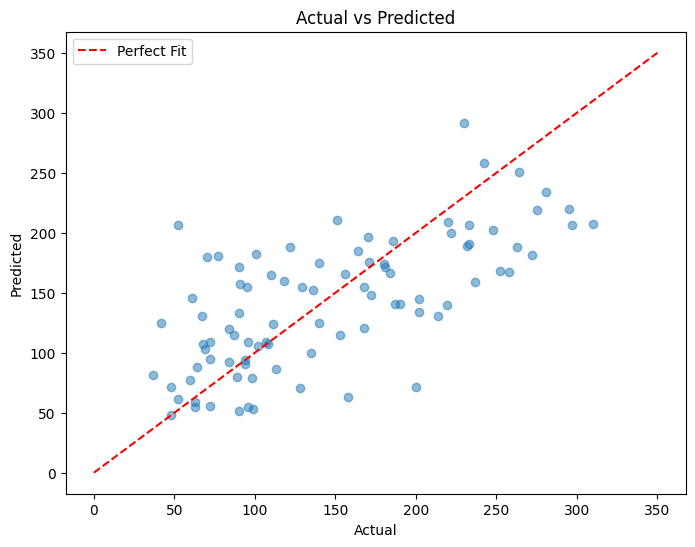

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 350], [0, 350], 'r--', label='Perfect Fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

### Practice Challenge
데이터 변경: `load_linnerud()` 데이터를 사용하여 멀티 아웃풋 회귀 실험을 해보세요.

In [30]:
# 1. 데이터 로드
# linnerud 데이터셋은 멀티 아웃풋(Multi-output) 회귀 문제입니다.
# 입력(Data): 3개의 운동 관련 변수 (Chins, Situps, Jumps)
# 타겟(Target): 3개의 신체 건강 변수 (Weight, Waist, Pulse)
linnerud = load_linnerud()
X_lin = linnerud.data
y_lin = linnerud.target

print(f"Linnerud Data shape: {X_lin.shape}")   # (20, 3)
print(f"Linnerud Target shape: {y_lin.shape}") # (20, 3)

# 2. 데이터 분리
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# 3. 모델 학습
# LinearRegression은 다중 타겟(y가 2개 이상의 컬럼)인 경우에도 자동으로 멀티 아웃풋 회귀를 수행합니다.
multi_model = LinearRegression()
multi_model.fit(X_train_lin, y_train_lin)

# 4. 예측 및 평가
y_pred_lin = multi_model.predict(X_test_lin)

# MSE와 R2 Score는 각 타겟 변수별로 평균을 내거나 별도로 확인할 수 있습니다.
mse_lin = mean_squared_error(y_test_lin, y_pred_lin)
r2_lin = r2_score(y_test_lin, y_pred_lin)

print(f"Linnerud MSE (Average): {mse_lin:.2f}")
print(f"Linnerud R2 Score (Average): {r2_lin:.2f}")

Linnerud Data shape: (20, 3)
Linnerud Target shape: (20, 3)
Linnerud MSE (Average): 239.15
Linnerud R2 Score (Average): -1.35


## 6. 인사이트 도출 (Insights)

### 🌟 Key Takeaways
*   **사이킷런 워크플로우**: `Data Load` -> `Model Create` -> `Fit` -> `Predict` -> `Evaluate`로 이어지는 머신러닝의 표준 파이프라인을 익혔습니다.
*   **단순함**: 복잡한 수학 공식 없이도 단 몇 줄의 코드로 회귀 모델을 만들 수 있었습니다.

### 🔬 Try More
*   **random_state 변경**: `train_test_split`의 `random_state` 숫자를 바꾸면 모델의 점수($R^2$)가 변하나요? 변한다면 그 이유는 무엇일까요?
